## 1. Problema de Optimización

### Ejemplo:

Queremos maximizar la función de costo \( C(x, y) \) sujeta a ciertas restricciones.

**Función de costo:**
$$ C(x, y) = 3x + 4y $$

**Restricciones:**
1. $$ x + 2y \leq 8 $$
2. $$ 3x + y \leq 12 $$
3. $$ x \geq 0 $$
4. $$ y \geq 0 $$

### Pasos para la solución

1. Definir la función de costo y las restricciones.
2. Graficar la región factible.
3. Crear un programa en Python para:
   a. Calcular el valor de la función de costo en un punto dado.
   b. Visualizar cómo cambia la región factible con diferentes restricciones.


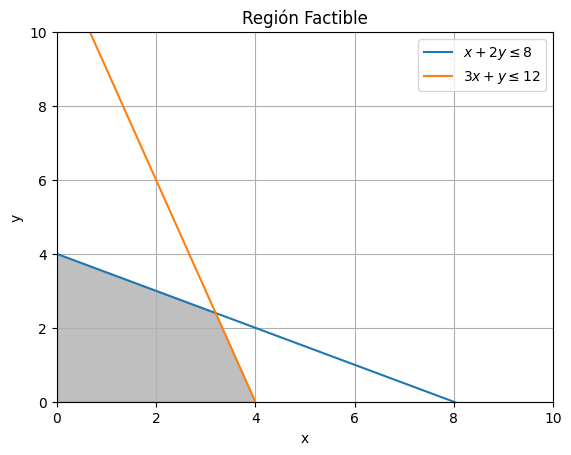

El valor de la función de costo en el punto (2, 3) es: 18


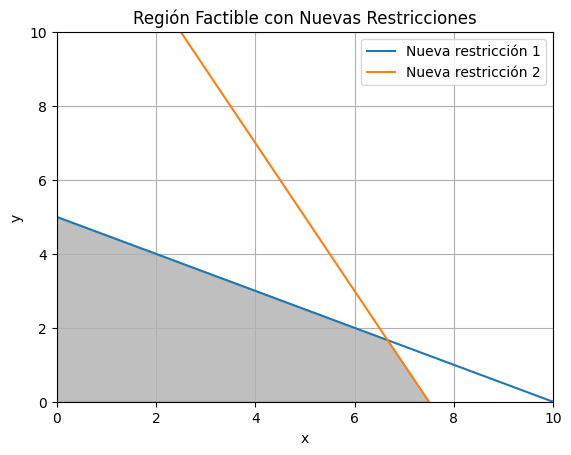

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones de restricción
def restriccion1(x):
    return (8 - x) / 2

def restriccion2(x):
    return 12 - 3 * x

# Configuración del gráfico
fig, ax = plt.subplots()

# Rango de valores para x
x = np.linspace(0, 10, 400)

# Graficar las restricciones
y1 = restriccion1(x)
y2 = restriccion2(x)

ax.plot(x, y1, label=r'$x + 2y \leq 8$')
ax.plot(x, y2, label=r'$3x + y \leq 12$')

# Rellenar la región factible
y_fill = np.minimum(y1, y2)
ax.fill_between(x, 0, y_fill, where=(x >= 0) & (y_fill >= 0), color='gray', alpha=0.5)

# Configuración del gráfico
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Región Factible')
ax.legend()
plt.grid(True)
plt.show()

# Función para calcular el valor de la función de costo en un punto (x, y)
def calcular_funcion_costo(x, y):
    return 3 * x + 4 * y

# Ejemplo de uso
punto_x = 2
punto_y = 3
print(f'El valor de la función de costo en el punto ({punto_x}, {punto_y}) es: {calcular_funcion_costo(punto_x, punto_y)}')

# Función para graficar la región factible con un cambio en las restricciones
def graficar_region_factible_nueva_restriccion(restriccion1, restriccion2):
    fig, ax = plt.subplots()

    # Graficar las nuevas restricciones
    y1 = restriccion1(x)
    y2 = restriccion2(x)

    ax.plot(x, y1, label=r'Nueva restricción 1')
    ax.plot(x, y2, label=r'Nueva restricción 2')

    # Rellenar la región factible
    y_fill = np.minimum(y1, y2)
    ax.fill_between(x, 0, y_fill, where=(x >= 0) & (y_fill >= 0), color='gray', alpha=0.5)

    # Configuración del gráfico
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Región Factible con Nuevas Restricciones')
    ax.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de nuevas restricciones
def nueva_restriccion1(x):
    return (10 - x) / 2

def nueva_restriccion2(x):
    return 15 - 2 * x

# Graficar la región factible con nuevas restricciones
graficar_region_factible_nueva_restriccion(nueva_restriccion1, nueva_restriccion2)


## 2. Representación de Matrices Dispersas en el Formato COO

### Problema

Representare matrices dispersas utilizando el formato de lista de coordenadas (COO). En este formato, una matriz se representa mediante tres listas:
- Una lista para los índices de las filas (`row_indices`).
- Una lista para los índices de las columnas (`col_indices`).
- Una lista para los valores de los elementos no cero (`data`).

El objetivo es:
1. Implementar una clase en Python para manejar matrices dispersas en el formato COO.
2. Comparar los resultados de nuestra implementación con la función de la biblioteca `scipy.sparse`.

### Implementación de la Clase `SparseMatrixCOO`

A continuación, se presenta una implementación básica de la clase `SparseMatrixCOO` que maneja matrices dispersas en el formato COO.

In [2]:
import numpy as np

class SparseMatrixCOO:
    def __init__(self, data, row_indices, col_indices, shape):
        self.data = data
        self.row_indices = row_indices
        self.col_indices = col_indices
        self.shape = shape

    def to_dense(self):
        """Convert the sparse matrix to a dense numpy array."""
        dense_matrix = np.zeros(self.shape)
        for i in range(len(self.data)):
            dense_matrix[self.row_indices[i], self.col_indices[i]] = self.data[i]
        return dense_matrix

    def __repr__(self):
        return f"SparseMatrixCOO(shape={self.shape})"

# Ejemplo de uso
data = [1, 2, 3]
row_indices = [0, 1, 2]
col_indices = [0, 1, 2]
shape = (3, 3)

sparse_matrix = SparseMatrixCOO(data, row_indices, col_indices, shape)
dense_matrix = sparse_matrix.to_dense()
print("Matriz densa:\n", dense_matrix)

Matriz densa:
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


**Para comparar nuestra implementación con una solución de biblioteca bien establecida, utilizamos scipy.sparse y su formato COO.**

In [3]:
from scipy.sparse import coo_matrix

# Crear la matriz dispersa usando scipy
scipy_sparse_matrix = coo_matrix((data, (row_indices, col_indices)), shape=shape)
scipy_dense_matrix = scipy_sparse_matrix.toarray()

print("Matriz densa usando scipy:\n", scipy_dense_matrix)

# Verificación de la equivalencia
assert np.allclose(dense_matrix, scipy_dense_matrix), "Las matrices densas no coinciden."
print("Las matrices densas coinciden.")


Matriz densa usando scipy:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
Las matrices densas coinciden.


## 3. Expansión en Series de Taylor

Para implementar una expansión en series de Taylor y permitir al usuario elegir entre varias funciones, primero necesitamos definir la serie de Taylor para cada función. La expansión en series de Taylor de una función \( f(x) \) alrededor de un punto \( a \) es una aproximación polinómica que se expresa como:

$$ f(x) \approx T_n(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(x - a)^n $$

donde $ f^{(k)}(a) $ es la $ k $-ésima derivada de $ f $ evaluada en $ a $ y $ n $ es el número de términos en la expansión.

### Pasos para la solución

1. Definir las funciones y sus derivadas.
2. Implementar la expansión en series de Taylor.
3. Permitir al usuario seleccionar la función, el punto de expansión, y el número de términos.
4. Graficar la función original y su aproximación.


Funciones disponibles:
1. sin(x)
2. cos(x)
3. exp(x)
4. log(x + 1)
5. tan(x)
Selecciona una función (1-5): 1
Ingresa el punto de expansión: 0
Ingresa el número de términos de la expansión: 5


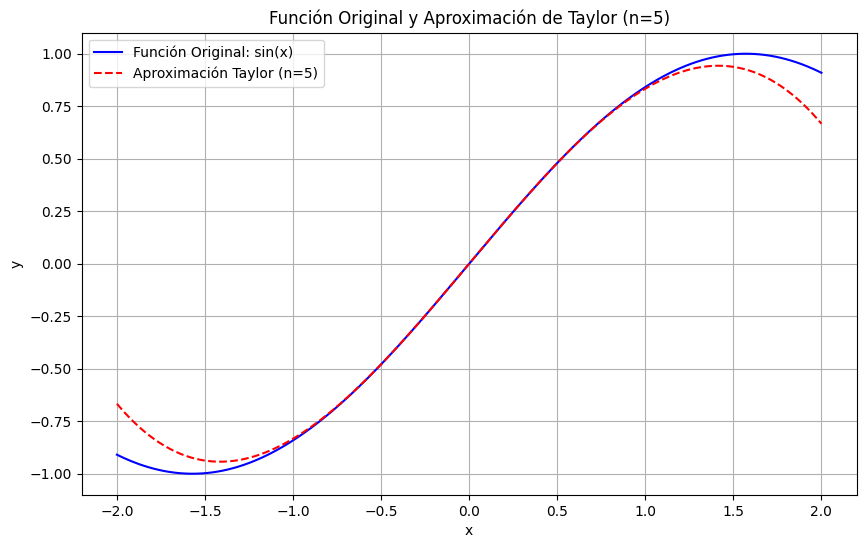

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir funciones simbólicas
x = sp.symbols('x')

def f1(x): return sp.sin(x)
def f2(x): return sp.cos(x)
def f3(x): return sp.exp(x)
def f4(x): return sp.log(x + 1)
def f5(x): return sp.tan(x)

functions = [f1, f2, f3, f4, f5]
function_names = ['sin(x)', 'cos(x)', 'exp(x)', 'log(x + 1)', 'tan(x)']

# Función para calcular la expansión en serie de Taylor
def taylor_series(f, a, n):
    taylor_approx = 0
    for k in range(n):
        # Calcular la k-ésima derivada
        derivative = sp.diff(f(x), x, k)
        # Evaluar la derivada en el punto a
        derivative_at_a = derivative.subs(x, a)
        # Agregar término de la serie de Taylor
        taylor_approx += (derivative_at_a / sp.factorial(k)) * (x - a)**k
    return taylor_approx

# Función principal
def main():
    print("Funciones disponibles:")
    for i, name in enumerate(function_names):
        print(f"{i + 1}. {name}")

    # Entrada del usuario
    func_choice = int(input("Selecciona una función (1-5): ")) - 1
    a = float(input("Ingresa el punto de expansión: "))
    num_terms = int(input("Ingresa el número de términos de la expansión: "))

    if func_choice < 0 or func_choice >= len(functions):
        print("Selección inválida.")
        return

    # Selección de la función
    selected_function = functions[func_choice]
    function_name = function_names[func_choice]

    # Definir el rango para la gráfica
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.array([float(selected_function(val).evalf()) for val in x_vals])

    # Calcular la aproximación de Taylor
    taylor_approx = taylor_series(selected_function, a, num_terms)
    taylor_vals = np.array([float(taylor_approx.subs(x, val).evalf()) for val in x_vals])

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label=f'Función Original: {function_name}', color='blue')
    plt.plot(x_vals, taylor_vals, label=f'Aproximación Taylor (n={num_terms})', color='red', linestyle='--')
    plt.title(f'Función Original y Aproximación de Taylor (n={num_terms})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar el programa
main()


## 4. Algoritmos de Optimización Sin Restricciones

Para abordar este problema, elegiremos tres algoritmos de optimización sin restricciones comunes:

**Descenso del Gradiente (Gradient Descent)**,
**Método de Newton y**,  
**Algoritmo de Búsqueda de Cuadrícula (Grid Search)**

Analizaremos cómo los cambios en los parámetros y el punto inicial afectan los resultados, el tiempo de convergencia y la cantidad de iteraciones. Utilizaremos Python para implementar estos algoritmos y explorar su comportamiento con diferentes configuraciones.

### 1. Descenso del gradiente (Gradient Descent)

El descenso del Gradiente es un método de optimización que busca encontrar el mínimo de una función moviéndose en la dirección opuesta al gradiente de la función en el punto actual.

**Parámetros Clave:**
- **Tasa de aprendizaje (learning rate):** Controla el tamaño del paso en cada iteración.
- **Número máximo de iteraciones:** Limita la cantidad de pasos que el algoritmo puede dar.

### 2. Método de Newton

El método de Newton utiliza la matriz Hessiana y el gradiente de la función para encontrar el mínimo. Es más rápido que el descenso del gradiente si la función es suficientemente suave, pero requiere el cálculo de la matriz Hessiana.

**Parámetros Clave:**
- **Número máximo de iteraciones:** Limita la cantidad de pasos que el algoritmo puede dar.
- **Tolerancia para la convergencia:** Determina cuándo detener el algoritmo basado en la convergencia de la solución.

### 3. Algoritmo de Búsqueda de cuadrícula (Grid Search)

El algoritmo de búsqueda de cuadrícula es un método exhaustivo que evalúa todas las posibles combinaciones de parámetros en una cuadrícula predefinida. Aunque no es un algoritmo de optimización en sí, es útil para la sintonización de parámetros.

**Parámetros Clave:**
- **Rango de valores para cada parámetro:** Define el intervalo de valores que se evaluarán para cada parámetro.
- **Resolución de la cuadrícula:** Controla la densidad de las combinaciones de parámetros que se evaluarán.



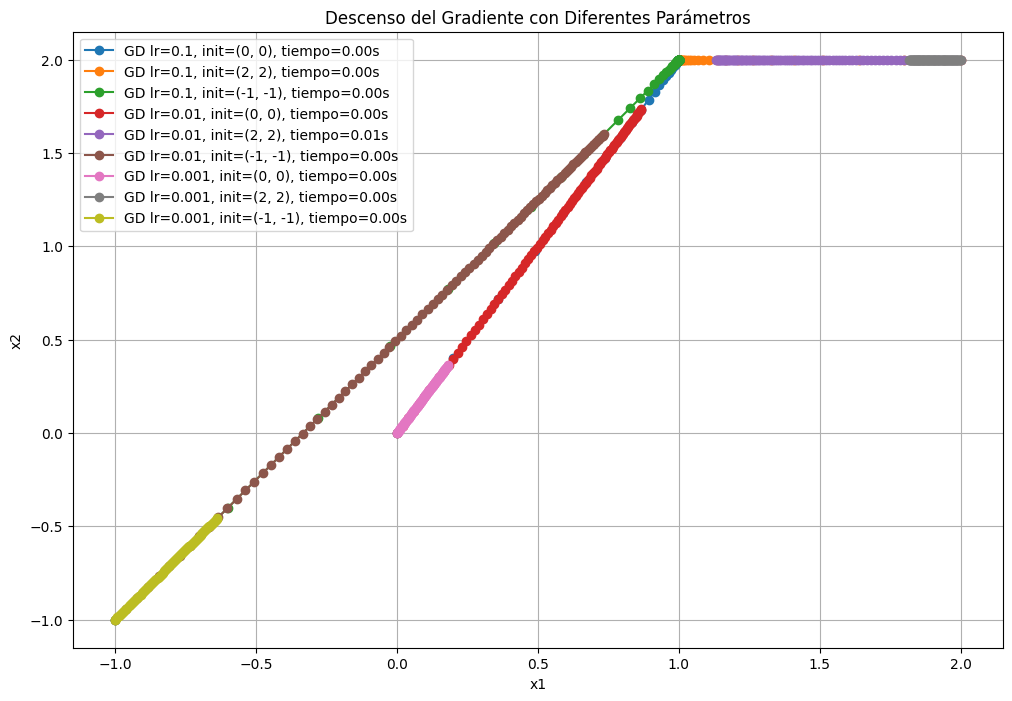

Método de Newton con init=(0, 0), tol=0.1, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(0, 0), tol=1e-05, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(0, 0), tol=1e-10, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(2, 2), tol=0.1, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(2, 2), tol=1e-05, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(2, 2), tol=1e-10, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(-1, -1), tol=0.1, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(-1, -1), tol=1e-05, tiempo=0.01s
  Punto final: [1. 2.]
  Número de iteraciones: 2

Método de Newton con init=(-1, -1), tol=1e-10, tiempo=0.00s
  Punto final: [1. 2.]
  Número de iteraciones: 2



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from time import time

# Función objetivo (ejemplo: función cuadrática)
def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

# Gradiente de la función objetivo
def gradient(x):
    return np.array([2*(x[0] - 1), 2*(x[1] - 2)], dtype=float)

# Hessiana de la función objetivo
def hessian(x):
    return np.array([[2, 0], [0, 2]], dtype=float)

# Descenso del Gradiente
def gradient_descent(initial_point, learning_rate, max_iter):
    x = np.array(initial_point, dtype=float)
    history = [x.copy()]
    for _ in range(max_iter):
        grad = gradient(x)
        x -= learning_rate * grad
        history.append(x.copy())
    return np.array(history)

# Método de Newton
def newton_method(initial_point, tol, max_iter):
    result = minimize(objective_function, initial_point, method='Newton-CG', jac=gradient, hess=hessian, options={'maxiter': max_iter})
    return result

# Exploración de parámetros y puntos iniciales
def run_experiment():
    learning_rates = [0.1, 0.01, 0.001]
    initial_points = [(0, 0), (2, 2), (-1, -1)]

    plt.figure(figsize=(12, 8))

    for lr in learning_rates:
        for init in initial_points:
            start_time = time()
            history = gradient_descent(init, lr, 100)
            elapsed_time = time() - start_time

            plt.plot(history[:, 0], history[:, 1], marker='o', label=f'GD lr={lr}, init={init}, tiempo={elapsed_time:.2f}s')

    plt.title('Descenso del Gradiente con Diferentes Parámetros')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

    for init in initial_points:
        for tol in [1e-1, 1e-5, 1e-10]:
            start_time = time()
            result = newton_method(init, tol, 100)
            elapsed_time = time() - start_time

            print(f"Método de Newton con init={init}, tol={tol}, tiempo={elapsed_time:.2f}s")
            print(f"  Punto final: {result.x}")
            print(f"  Número de iteraciones: {result.nit}\n")

# Ejecutar experimentos
run_experiment()



# Exposición

## 1. Optimización con Restricciones

**Problema:**
Maximizar la función de costo \( C(x, y) = 3x + 4y \) sujeta a restricciones:
- $$ x + 2y \leq 8 $$
- $$ 3x + y \leq 12 $$
- $$ x \geq 0 $$
- $$ y \geq 0 $$

**Lo que hice:**
- Definí la función de costo y restricciones.
- Grafiqué la región factible usando Python.
- Creé un programa que permite:
  - Calcular el valor de la función en un punto dado.
  - Visualizar cómo cambia la región factible con nuevas restricciones.

**Herramientas:**
- **Matplotlib:** Biblioteca para crear gráficos en Python.
- **Numpy:** Biblioteca para cálculos numéricos y operaciones con arrays.

**Lo aprendido:**
- Uso de `matplotlib` y `numpy` para graficar y calcular.
- Implementación de restricciones en la visualización.

## 2. Representación de Matrices Sparse

**Problema:**
Elegir un método para representar matrices sparse y compararlo con bibliotecas existentes.

**Lo que hice:**
- Implementé desde cero la representación en formato **COO** (Coordinate List).
- Comparé con `scipy.sparse` para validar resultados.

**Herramientas:**
- **Scipy.sparse:** Módulo de `scipy` para manipular matrices sparse.

**Lo aprendido:**
- Creación y manejo de matrices sparse.
- Comparación entre implementación personalizada y librerías estándar.

## 3. Expansión en Series de Taylor

**Problema:**
Implementar expansión en series de Taylor para varias funciones.

**Lo que hice:**
- Definí funciones y sus derivadas.
- Permití al usuario seleccionar función, punto de expansión, y número de términos.
- Graficé la función original y su aproximación.

**Herramientas:**
- **SymPy:** Biblioteca para matemáticas simbólicas y cálculo algebraico.
- **Matplotlib:** Biblioteca para crear gráficos en Python.

**Lo aprendido:**
- Cálculo y uso de series de Taylor.
- Implementación de gráficos en Python con `matplotlib`.

## 4. Algoritmos de Optimización Sin Restricciones

**Problema:**
Comparar tres algoritmos:
1. Descenso del Gradiente
2. Método de Newton
3. Búsqueda de Cuadrícula

**Lo que hice:**
- Implementé cada algoritmo en Python.
- Ajusté parámetros y puntos iniciales.
- Analicé el impacto en el tiempo de convergencia y número de iteraciones.

**Herramientas:**
- **SciPy.optimize:** Módulo de `scipy` para optimización de funciones matemáticas.

**Lo aprendido:**
- Diferencias en comportamiento y eficiencia de los algoritmos.
- Uso de `scipy.optimize` para métodos avanzados.
